# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings



In [25]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [37]:
# Try loading one file

df1 = pd.read_parquet('/Users/noopur.nigam/ML and AI executive Program/NycTaxi Case Study/Datasets and Dictionary/trip_records/2023-1.parquet')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [345]:
# from google.colab import drive
# drive.mount('/content/drive')

In [75]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#  read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/noopur.nigam/ML and AI executive Program/NycTaxi Case Study/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_current=pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        df_current['date'] = df_current['tpep_pickup_datetime'].dt.date
        df_current['hour'] = df_current['tpep_pickup_datetime'].dt.hour
        for date in df_current['date'].unique():
            date_data = df_current[df_current['date'] == date]
            for hour in range(24):
                hour_data = date_data[date_data['hour'] == hour]
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)
        print(df.info())


    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166709 entries, 0 to 166708
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               166709 non-null  int32         
 1   tpep_pickup_datetime   166709 non-null  datetime64[us]
 2   tpep_dropoff_datetime  166709 non-null  datetime64[us]
 3   passenger_count        157770 non-null  float64       
 4   trip_distance          166709 non-null  float64       
 5   RatecodeID             157770 non-null  float64       
 6   store_and_fwd_flag     157770 non-null  object        
 7   PULocationID           166709 non-null  int32         
 8   DOLocationID           166709 non-null  int32         
 9   payment_type           166709 non-null  int64         
 10  fare_amount            166709 non-null  float64       
 11  extra                  166709 non-null  float64       
 12  mta_tax                166709 non-null  floa

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086254 entries, 0 to 2086253
Data columns (total 27 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [71]:
# Store the df in csv/parquet
# Extract date from tpep_pickup_datetime
# df['date'] = df['tpep_pickup_datetime'].dt.date

# # Create a new DataFrame with distinct date values
# df_distinct_dates = df[['date']].drop_duplicates().reset_index(drop=True)
# print(df_distinct_dates)
df.to_parquet('/Users/noopur.nigam/ML and AI executive Program/NycTaxi Case Study/Datasets and Dictionary/trip_records/sample_taxi_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [123]:
# Load the written data file in above step to create new_df
new_df = pd.read_parquet('/Users/noopur.nigam/ML and AI executive Program/NycTaxi Case Study/Datasets and Dictionary/trip_records/sample_taxi_data.parquet')
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [125]:
print(new_df)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1               2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2               2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3               2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4               2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
...           ...                  ...                   ...              ...   
1896395         2  2023-06-30 23:53:10   2023-07-01 00:05:55              1.0   
1896396         1  2023-06-30 23:22:42   2023-06-30 23:39:06              1.0   
1896397         1  2023-06-30 23:50:42   2023-07-01 00:20:00              2.0   
1896398         1  2023-06-30 23:05:31   2023-06-30 23:15:52              1.0   
1896399         2  2023-07-01 00:00:51   2023-07-01 00:24:19              1.0   

         trip_distance  Rat

In [127]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [347]:
# Fix the index and drop any columns that are not needed
# new_df.drop(['airport_fee'], axis=1, inplace=True)

# Reset the index
# new_df.reset_index(drop=True, inplace=True)

In [129]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [121]:
# Combine the two airport fee columns
new_df['airport_fee'] = new_df['Airport_fee'].fillna(0) + new_df['airport_fee'].fillna(0)


**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [133]:
# check where values of fare amount are negative
monetary_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
for col in monetary_columns:
    new_df[col] = df[col].abs()


Did you notice something different in the `RatecodeID` column for above records?

In [135]:
# Analyse RatecodeID for the negative fare amounts

negative_fares = new_df[new_df['fare_amount'] < 0]
ratecode_counts = negative_fares['RatecodeID'].value_counts()
print("RatecodeID distribution for negative fare amounts:")
print(ratecode_counts)

RatecodeID distribution for negative fare amounts:
Series([], Name: count, dtype: int64)


In [137]:
# Find which columns have negative values
numeric_columns = new_df.select_dtypes(include=['int64', 'float64']).columns
negative_columns = new_df[numeric_columns].columns[(new_df[numeric_columns] < 0).any()]
print("Columns with negative values:")
print(negative_columns)


Columns with negative values:
Index(['Airport_fee'], dtype='object')


In [139]:
# fix these negative values
monetary_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
for col in monetary_columns:
    new_df[col] = new_df[col].abs()

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [141]:
# Find the proportion of missing values in each column

missing_proportions = new_df.isnull().mean()


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [143]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
null_passenger_rows = new_df[new_df['passenger_count'].isnull()]
print("Rows with null passenger_count:")
print(null_passenger_rows)

median_passengers = new_df['passenger_count'].median()
new_df['passenger_count'] = new_df['passenger_count'].fillna(median_passengers)

print(f"\nNull values in passenger_count imputed with median: {median_passengers}")

Rows with null passenger_count:
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, date, hour, airport_fee]
Index: []

[0 rows x 22 columns]

Null values in passenger_count imputed with median: 1.0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [145]:
# Fix missing values in 'RatecodeID'

# Checkinkg the distribution of RatecodeID
print(new_df['RatecodeID'].value_counts(dropna=False))

# Imputing missing values with the mode (most frequent value)
mode_ratecode = new_df['RatecodeID'].mode()[0]
new_df['RatecodeID'] = new_df['RatecodeID'].fillna(mode_ratecode)

# Verifying the imputation
print(new_df['RatecodeID'].value_counts(dropna=False))

RatecodeID
1.0     1794133
2.0       71670
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64
RatecodeID
1.0     1794133
2.0       71670
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [149]:
# handle null values in congestion_surcharge

print(new_df['congestion_surcharge'].value_counts(dropna=False))

new_df['congestion_surcharge'] = new_df['congestion_surcharge'].fillna(0)

print(new_df['congestion_surcharge'].value_counts(dropna=False))


congestion_surcharge
2.5    1756054
0.0     140345
0.5          1
Name: count, dtype: int64
congestion_surcharge
2.5    1756054
0.0     140345
0.5          1
Name: count, dtype: int64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [147]:
# Handle any remaining missing values

# Checking for any remaining missing values
missing_values = new_df.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]
print("Columns with remaining missing values:")
print(columns_with_missing)

# Handling missing values in numeric columns
numeric_columns = new_df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    if new_df[col].isnull().sum() > 0:
        new_df[col].fillna(new_df[col].median(), inplace=True)

# Handling missing values in categorical columns
categorical_columns = new_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if new_df[col].isnull().sum() > 0:
        new_df[col].fillna(df[col].mode()[0], inplace=True)

# Verifying that all missing values have been handled
print("\nRemaining missing values after imputation:")
print(new_df.isnull().sum().sum())


Columns with remaining missing values:
congestion_surcharge      65887
airport_fee             1740496
dtype: int64


/var/folders/zx/ddt9vhvn24zcwr94ds7ytwm80000gp/T/ipykernel_59540/2955682808.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df[col].fillna(new_df[col].median(), inplace=True)



Remaining missing values after imputation:
0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [151]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Checking for invalid passenger counts
invalid_passengers = new_df[(new_df['passenger_count'] <= 0) | (new_df['passenger_count'] > 6)]
print("Invalid passenger counts:", len(invalid_passengers))

# Checking for suspiciously short or long trips
suspicious_distances = new_df[(new_df['trip_distance'] == 0) | (new_df['trip_distance'] > 100)]
print("Suspicious trip distances:", len(suspicious_distances))

# Checking for negative fares or tips
negative_fares = new_df[new_df['fare_amount'] < 0]
negative_tips = new_df[new_df['tip_amount'] < 0]
print("Negative fares:", len(negative_fares))
print("Negative tips:", len(negative_tips))

# Checking for extremely high total amounts
high_totals = new_df[new_df['total_amount'] > 1000]
print("Extremely high total amounts:", len(high_totals))

Invalid passenger counts: 29702
Suspicious trip distances: 37796
Negative fares: 0
Negative tips: 0
Extremely high total amounts: 2


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [153]:
# removing passenger_count > 6

new_df = new_df[new_df['passenger_count'] <= 6]

print(new_df['passenger_count'].value_counts(sort=True))


passenger_count
1.0    1442098
2.0     277298
3.0      69034
4.0      38537
0.0      29681
5.0      23871
6.0      15860
Name: count, dtype: int64


In [159]:
# Continue with outlier handling

# Removing entries where trip_distance is nearly 0 and fare_amount is more than 300
new_df = new_df[(new_df['trip_distance'] > 0.1) | (new_df['fare_amount'] <= 300)]

# Removing entries where trip_distance and fare_amount are 0 but pickup and dropoff zones are different
new_df = new_df[~((new_df['trip_distance'] == 0) & (new_df['fare_amount'] == 0) & (new_df['PULocationID'] != new_df['DOLocationID']))]

# Removing entries where trip_distance is more than 250 miles
new_df = new_df[new_df['trip_distance'] <= 250]

# Removing entries where payment_type is 0
new_df = new_df[new_df['payment_type'] != 0]

# Additional outlier handling:
# Removing extreme fare amounts (e.g., above 99.9th percentile)
fare_threshold = new_df['fare_amount'].quantile(0.999)
new_df = new_df[new_df['fare_amount'] <= fare_threshold]

# Resetting the index after removing outliers
new_df.reset_index(drop=True, inplace=True)

print("Number of rows after removing outliers:", len(new_df))


Number of rows after removing outliers: 1827800


In [163]:
# Do any columns need standardising?

from sklearn.preprocessing import StandardScaler

# Selecting columns to standardize
columns_to_standardize = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 
                          'tolls_amount', 'improvement_surcharge', 'total_amount', 
                          'congestion_surcharge', 'airport_fee',]

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the selected columns
new_df[columns_to_standardize] = scaler.fit_transform(new_df[columns_to_standardize])

print("Columns have been standardized.")

Columns have been standardized.


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
new_df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

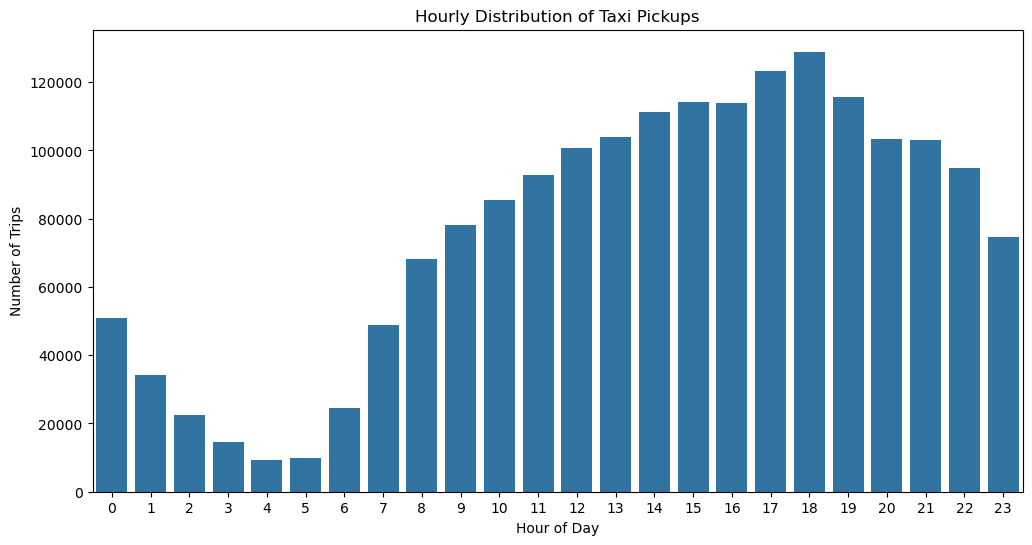

In [168]:
# Find and show the hourly trends in taxi pickups
# Grouping data by hour and count trips
hourly_trips = new_df.groupby(new_df['tpep_pickup_datetime'].dt.hour)['VendorID'].count().reset_index(name='trip_count')

# Creating a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='tpep_pickup_datetime', y='trip_count', data=hourly_trips)
plt.title('Hourly Distribution of Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.show()


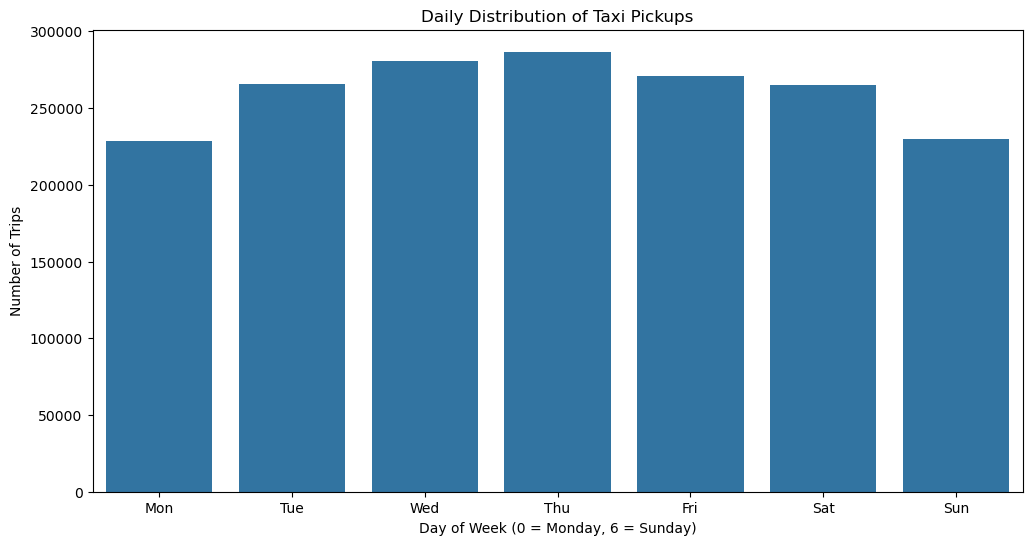

In [170]:
# Find and show the daily trends in taxi pickups (days of the week)
# Extracting day of week from pickup datetime
new_df['day_of_week'] = new_df['tpep_pickup_datetime'].dt.dayofweek

# Grouping data by day of week and count trips
daily_trips = new_df.groupby('day_of_week')['VendorID'].count().reset_index(name='trip_count')

# Creating a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='trip_count', data=daily_trips)
plt.title('Daily Distribution of Taxi Pickups')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Number of Trips')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


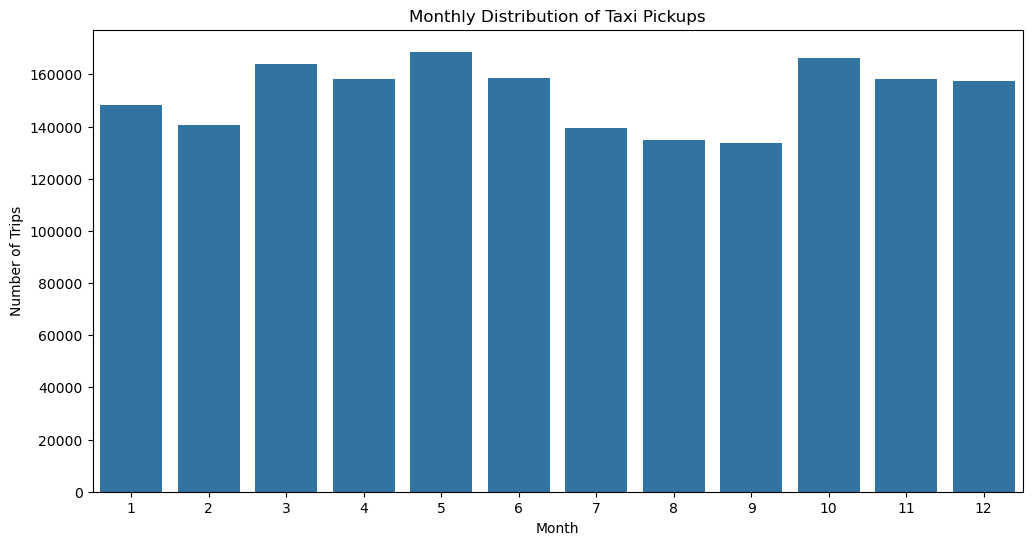

In [172]:
# Show the monthly trends in pickups

# Extracting month from pickup datetime
new_df['month'] = new_df['tpep_pickup_datetime'].dt.month

# Grouping data by month and count trips
monthly_trips = new_df.groupby('month')['VendorID'].count().reset_index(name='trip_count')

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='trip_count', data=monthly_trips)
plt.title('Monthly Distribution of Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [356]:
# Analyse the above parameters

# Check for zero or negative values in financial parameters and trip distance
financial_params = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for param in financial_params:
    zero_count = (new_df[param] == 0).sum()
    negative_count = (new_df[param] < 0).sum()
    print(f"{param}:")
    print(f"  Zero values: {zero_count}")
    print(f"  Negative values: {negative_count}")
    print(f"  Minimum value: {new_df[param].min()}")
    print(f"  Maximum value: {new_df[param].max()}")
    print()

# Display basic statistics for these parameters
print(new_df[financial_params].describe())

fare_amount:
  Zero values: 0
  Negative values: 1278740
  Minimum value: -1.1671607459292763
  Maximum value: 5.663087918735489

tip_amount:
  Zero values: 0
  Negative values: 1160381
  Minimum value: -0.8948583647325676
  Maximum value: 55.77624526722365

total_amount:
  Zero values: 0
  Negative values: 1300820
  Minimum value: -1.3408557414673932
  Maximum value: 10.270870306863097

trip_distance:
  Zero values: 0
  Negative values: 1381578
  Minimum value: -0.7627576698884535
  Maximum value: 44.75851424330923

        fare_amount    tip_amount  total_amount  trip_distance
count  1.827800e+06  1.827800e+06  1.827800e+06   1.827800e+06
mean   1.348741e-17  3.039885e-16 -2.906381e-16  -4.035337e-17
std    1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00
min   -1.167161e+00 -8.948584e-01 -1.340856e+00  -7.627577e-01
25%   -6.099562e-01 -6.408190e-01 -5.901949e-01  -5.294406e-01
50%   -3.583155e-01 -1.708461e-01 -3.531441e-01  -3.672297e-01
75%    1.449660e-01  2.279957e-01  1

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [174]:
# Create a pdf with non-zero entries for the selected parameters.
non_zero_df = new_df[(new_df['fare_amount'] > 0) & 
                 (new_df['tip_amount'] > 0) & 
                 (new_df['total_amount'] > 0)]

# Keep zero-distance trips where pickup and dropoff zones are the same
zero_distance_same_zone = new_df[(new_df['trip_distance'] == 0) & 
                             (new_df['PULocationID'] == new_df['DOLocationID'])]

# Combine non-zero entries with valid zero-distance trips
filtered_df = pd.concat([non_zero_df, zero_distance_same_zone])

print(f"Original DataFrame size: {len(new_df)}")
print(f"Filtered DataFrame size: {len(filtered_df)}")


Original DataFrame size: 1827800
Filtered DataFrame size: 363367


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

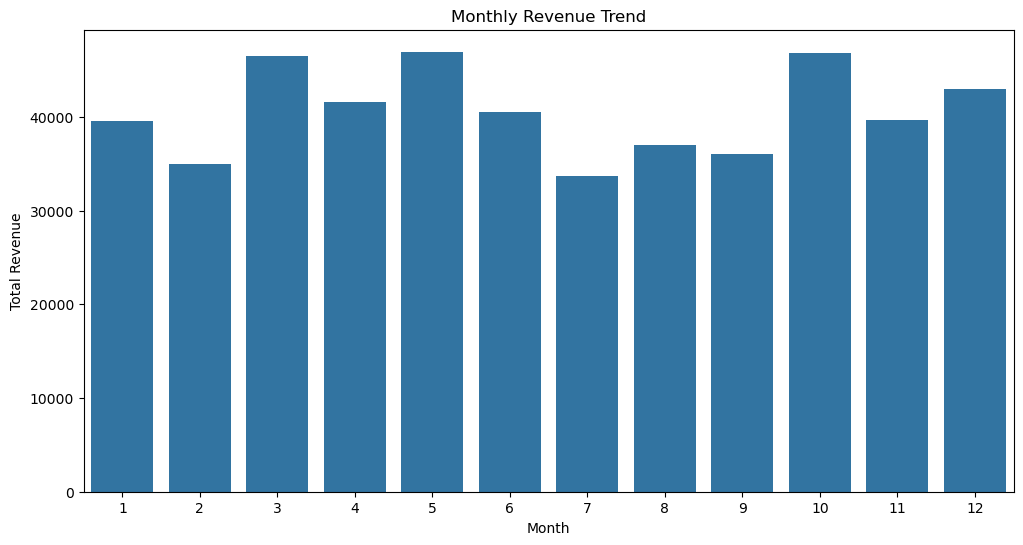

    Month       Revenue
0       1  39517.567572
1       2  34968.363257
2       3  46497.895834
3       4  41570.569833
4       5  46959.971887
5       6  40553.534798
6       7  33670.783288
7       8  36983.711687
8       9  36023.598599
9      10  46825.054311
10     11  39630.424111
11     12  42946.025562


In [176]:
# Group data by month and analyse monthly revenue
monthly_revenue = filtered_df.groupby(filtered_df['tpep_pickup_datetime'].dt.month)['total_amount'].sum().reset_index()
monthly_revenue.columns = ['Month', 'Revenue']
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Revenue', data=monthly_revenue)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()
print(monthly_revenue)


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

   quarter   total_amount  proportion
0        1  120983.826663    0.248862
1        2  129084.076519    0.265525
2        3  106678.093574    0.219436
3        4  129401.503985    0.266177


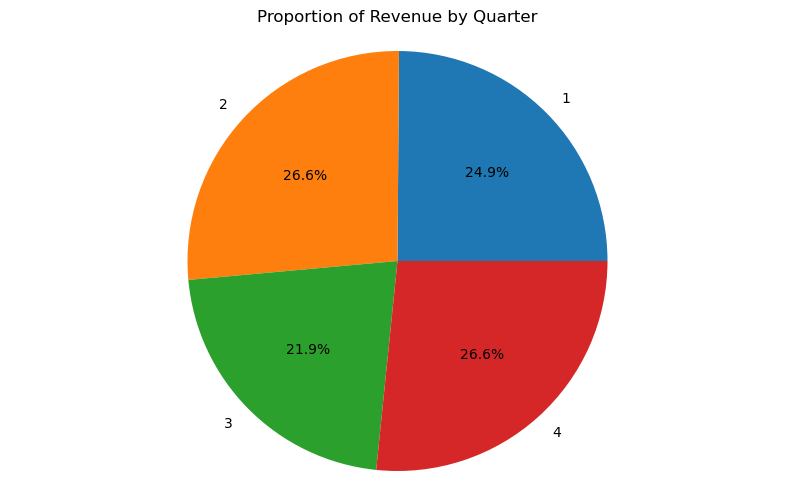

In [178]:
# Calculate proportion of each quarter

# Calculating total revenue per quarter
filtered_df['quarter'] = filtered_df['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = filtered_df.groupby('quarter')['total_amount'].sum().reset_index()

# Calculating total revenue
total_revenue = quarterly_revenue['total_amount'].sum()

# Calculating proportion for each quarter
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue
print(quarterly_revenue)

plt.figure(figsize=(10, 6))
plt.pie(quarterly_revenue['proportion'], labels=quarterly_revenue['quarter'], autopct='%1.1f%%')
plt.title('Proportion of Revenue by Quarter')
plt.axis('equal')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

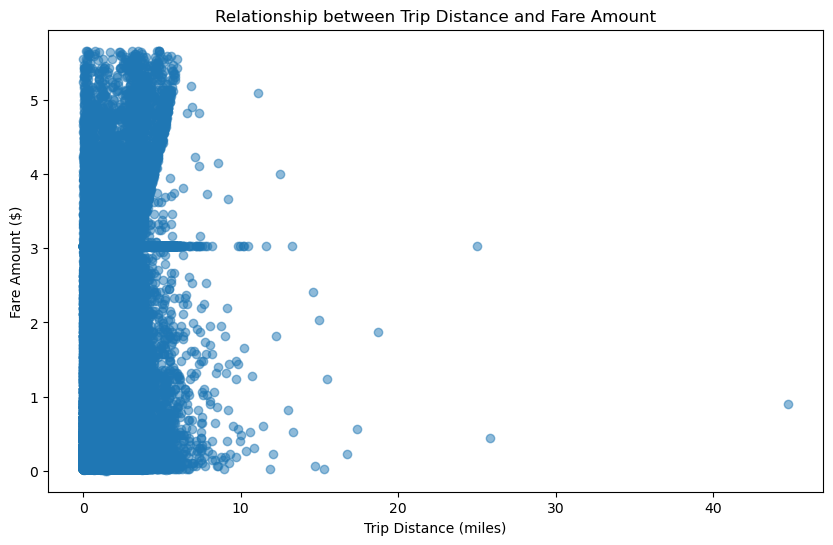

Correlation between trip distance and fare amount: 0.49


In [180]:
# Show how trip fare is affected by distance

# Filtering out trips with trip_distance = 0
non_zero_distance = filtered_df[filtered_df['trip_distance'] > 0]

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(non_zero_distance['trip_distance'], non_zero_distance['fare_amount'], alpha=0.5)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Calculating the correlation coefficient
correlation = non_zero_distance['trip_distance'].corr(non_zero_distance['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation:.2f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

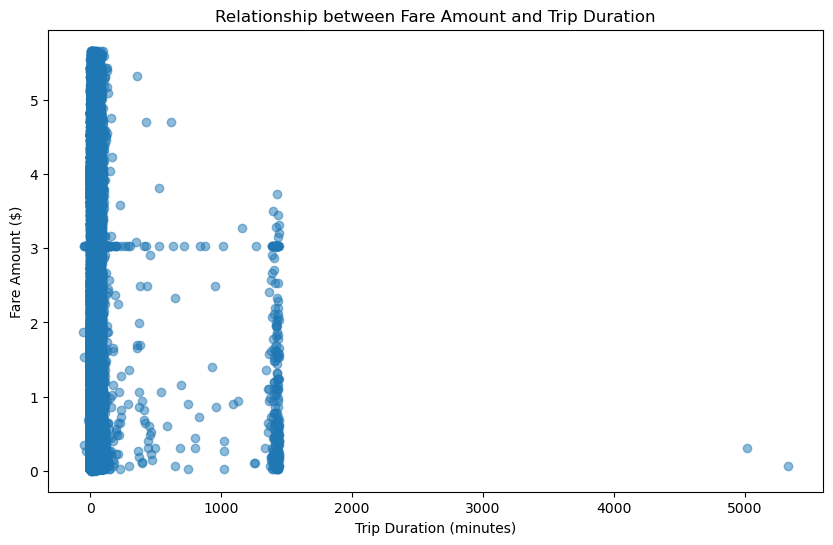

Correlation between trip duration and fare amount: 0.06


In [183]:
# Show relationship between fare and trip duration

# Calculating trip duration
filtered_df['trip_duration'] = (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['trip_duration'], filtered_df['fare_amount'], alpha=0.5)
plt.title('Relationship between Fare Amount and Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Calculating the correlation coefficient
correlation = filtered_df['trip_duration'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation:.2f}")

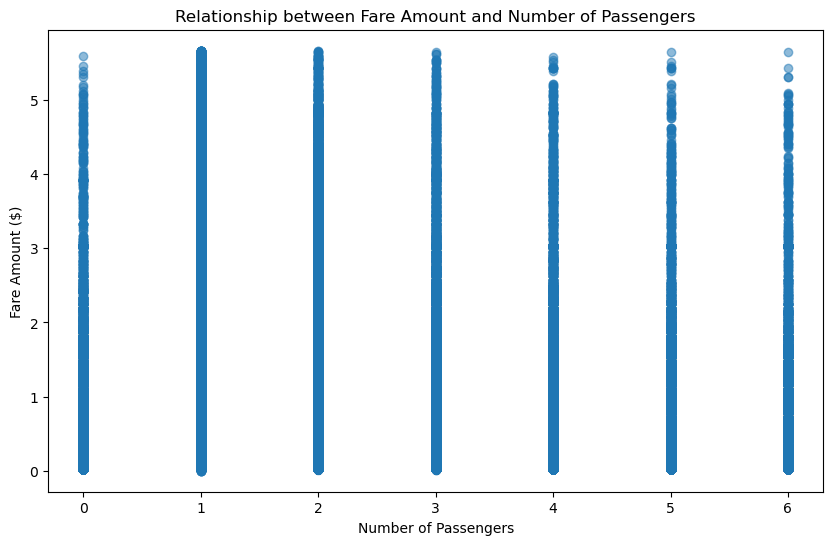

Correlation between passenger count and fare amount: 0.02


In [185]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['passenger_count'], filtered_df['fare_amount'], alpha=0.5)
plt.title('Relationship between Fare Amount and Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.show()

# Calculate the correlation coefficient
correlation = filtered_df['passenger_count'].corr(filtered_df['fare_amount'])
print(f"Correlation between passenger count and fare amount: {correlation:.2f}")



In [190]:
# Show relationship between tip and trip distance
# creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['trip_distance'], filtered_df['tip_amount'], alpha=0.5)
plt.title('Relationship between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

# Calculate the correlation coefficient
correlation = filtered_df['trip_distance'].corr(filtered_df['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation:.2f}")


Correlation between trip distance and tip amount: 0.20


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [196]:
# Analyse the distribution of different payment types (payment_type).

payment_type_distribution = filtered_df['payment_type'].value_counts(normalize=True)
print("Distribution of payment types:")
print(payment_type_distribution)

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_distribution.index, y=payment_type_distribution.values)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Proportion')
plt.xticks([1, 2, 3, 4], ['Credit card', 'Cash', 'No charge', 'Dispute'])
plt.show()

Distribution of payment types:
payment_type
1    0.865434
2    0.125223
4    0.005614
3    0.003729
Name: proportion, dtype: float64


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [194]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 19.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.8 MB/s eta 0:00:00


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [201]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/Users/noopur.nigam/ML and AI executive Program/NycTaxi Case Study/Datasets and Dictionary/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

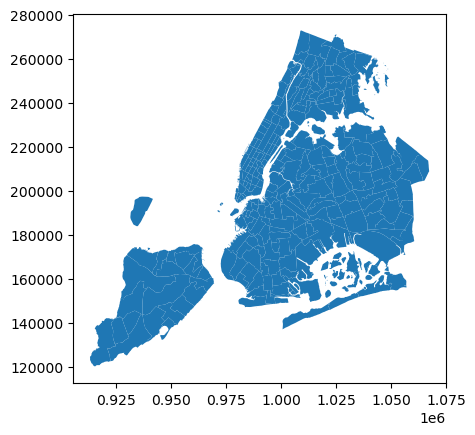

In [203]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [206]:
# Merge zones and trip records using locationID and PULocationID

merged_df = pd.merge(filtered_df, zones, left_on='PULocationID', right_on='LocationID', how='left')
print(merged_df.head())
print(f"Shape of merged dataframe: {merged_df.shape}")

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:04:10   2023-12-01 00:35:10              1.0   
2         2  2023-12-01 00:22:15   2023-12-01 00:40:41              1.0   
3         2  2023-12-01 00:34:32   2023-12-01 00:52:58              1.0   
4         2  2023-12-01 00:33:01   2023-12-01 00:53:27              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0       0.123847         1.0                  N           148            50   
1       1.563747         1.0                  N            48           189   
2       0.246061         1.0                  N            79           239   
3      -0.053918         1.0                  N           164           239   
4       3.034755         4.0                  N           132           265   

   payment_type  ...  month  quarter  trip_duration  OBJECTID  Shape_Leng 

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [208]:
# Group data by location and calculate the number of trips
trips_per_location = merged_df.groupby('PULocationID')['VendorID'].count().reset_index(name='trip_count')
print(trips_per_location.head())

print("\nTop 10 locations by number of trips:")
print(trips_per_location.sort_values('trip_count', ascending=False).head(10))

   PULocationID  trip_count
0             1          40
1             2           2
2             3           7
3             4         395
4             5           2

Top 10 locations by number of trips:
     PULocationID  trip_count
115           132       29431
121           138       22116
143           161       16041
215           237       14733
214           236       13577
165           186       12565
144           162       12155
208           230       11922
125           142       10626
152           170       10168


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [210]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trips_per_location, left_on='LocationID', right_on='PULocationID', how='left')

# Filling any NaN values with 0 for zones without trips
zones['trip_count'] = zones['trip_count'].fillna(0)

print("GeoDataFrame updated with trip counts:")
print(zones[['LocationID', 'zone', 'trip_count']].head())


GeoDataFrame updated with trip counts:
   LocationID                     zone  trip_count
0           1           Newark Airport        40.0
1           2              Jamaica Bay         2.0
2           3  Allerton/Pelham Gardens         7.0
3           4            Alphabet City       395.0
4           5            Arden Heights         2.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [360]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the map and display it
zones.plot(column='trip_count', 
           ax=ax,
           legend=True,
           legend_kwds={'label': "Number of Trips", 'orientation': "vertical"},
           cmap='YlOrRd')

plt.title('Zone-wise Trip Distribution in New York City')
plt.axis('off')
plt.show()



In [215]:
# can you try displaying the zones DF sorted by the number of trips?

sorted_zones = zones.sort_values('trip_count', ascending=False)

# Display the top zones by number of trips
print(sorted_zones[['LocationID', 'zone', 'borough', 'trip_count']].head(10))

     LocationID                          zone    borough  trip_count
131         132                   JFK Airport     Queens     29431.0
137         138             LaGuardia Airport     Queens     22116.0
160         161                Midtown Center  Manhattan     16041.0
236         237         Upper East Side South  Manhattan     14733.0
235         236         Upper East Side North  Manhattan     13577.0
185         186  Penn Station/Madison Sq West  Manhattan     12565.0
161         162                  Midtown East  Manhattan     12155.0
229         230     Times Sq/Theatre District  Manhattan     11922.0
141         142           Lincoln Square East  Manhattan     10626.0
169         170                   Murray Hill  Manhattan     10168.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [222]:
# Find routes which have the slowest speeds at different times of the day
# Calculating trip duration in hours
new_df['trip_duration'] = (new_df['tpep_dropoff_datetime'] - new_df['tpep_pickup_datetime']).dt.total_seconds() / 3600

# Calculating speed for each trip
new_df['speed'] = new_df['trip_distance'] / new_df['trip_duration']

# Grouping by pickup zone, dropoff zone, and hour to calculate average speed
slow_routes = new_df.groupby(['PULocationID', 'DOLocationID', new_df['tpep_pickup_datetime'].dt.hour])['speed'].mean().reset_index()

# Sorting routes by average speed in ascending order
slow_routes = slow_routes.sort_values('speed')

print("Top 10 slowest routes:")
print(slow_routes.head(10))


Top 10 slowest routes:
       PULocationID  DOLocationID  tpep_pickup_datetime  speed
73461           158           264                    21   -inf
57292           138           264                    10   -inf
57291           138           264                     9   -inf
57287           138           264                     0   -inf
55356           138           138                    13   -inf
53401           137           264                    11   -inf
53398           137           264                     8   -inf
52254           137           137                    19   -inf
51205           134           264                    12   -inf
51017           132           264                    23   -inf


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

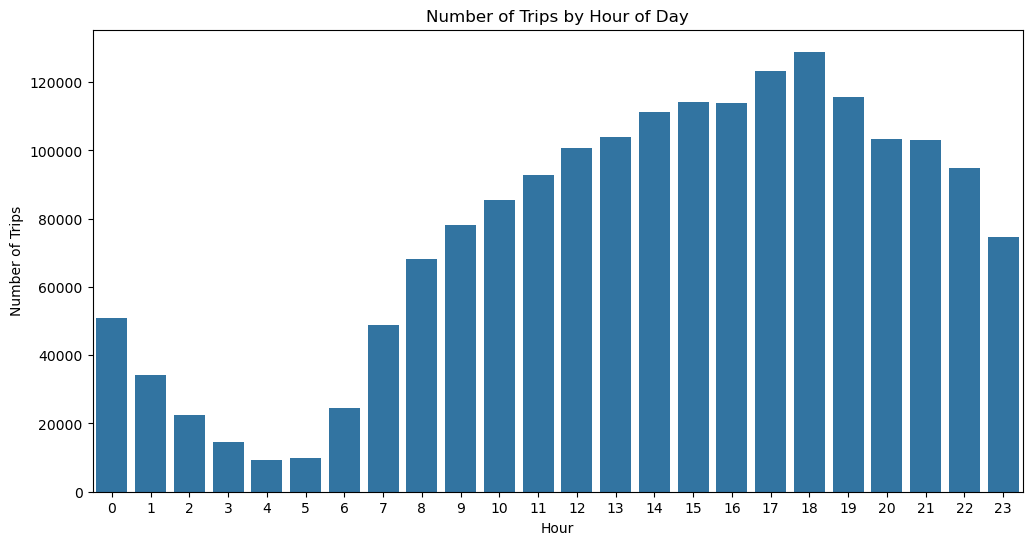

The busiest hour is 18:00 with 128940 trips


In [224]:
# Visualise the number of trips per hour and find the busiest hour

new_df['hour'] = new_df['tpep_pickup_datetime'].dt.hour

hourly_trips = new_df.groupby('hour')['VendorID'].count().reset_index(name='trip_count')
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='trip_count', data=hourly_trips)
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

# Finding the busiest hour
busiest_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax()]
print(f"The busiest hour is {busiest_hour['hour']}:00 with {busiest_hour['trip_count']} trips")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [257]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Assuming we have a DataFrame 'hourly_trips' with 'hour' and 'trip_count' columns
# Scale up the number of trips
hourly_trips['scaled_trip_count'] = hourly_trips['trip_count'] / sample_fraction

# Sort by scaled trip count in descending order and select top 5
top_5_busiest_hours = hourly_trips.sort_values('scaled_trip_count', ascending=False).head(5)

print("Top 5 busiest hours with actual number of trips:")
for _, row in top_5_busiest_hours.iterrows():
    print(f"Hour {row['hour']}: {row['scaled_trip_count']:.0f} trips")

Top 5 busiest hours with actual number of trips:
Hour 18.0: 2578800 trips
Hour 17.0: 2466280 trips
Hour 19.0: 2314120 trips
Hour 15.0: 2281380 trips
Hour 16.0: 2281020 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [260]:
# Compare traffic trends for the week days and weekends

# Extract day of week and hour from pickup datetime
new_df['day_of_week'] = new_df['tpep_pickup_datetime'].dt.dayofweek
new_df['hour'] = new_df['tpep_pickup_datetime'].dt.hour

# Separate weekday and weekend data
weekday_data = new_df[new_df['day_of_week'].isin([0, 1, 2, 3, 4])]
weekend_data = new_df[new_df['day_of_week'].isin([5, 6])]

# Calculate hourly trip counts for weekdays and weekends
weekday_hourly = weekday_data.groupby('hour')['VendorID'].count().reset_index(name='trip_count')
weekend_hourly = weekend_data.groupby('hour')['VendorID'].count().reset_index(name='trip_count')

# Visualize the comparison
plt.figure(figsize=(12, 6))
plt.plot(weekday_hourly['hour'], weekday_hourly['trip_count'], label='Weekdays')
plt.plot(weekend_hourly['hour'], weekend_hourly['trip_count'], label='Weekends')
plt.title('Hourly Traffic Pattern: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 Pickup Zones:
PULocationID
132    4011.791667
237    3616.166667
161    3574.791667
236    3225.291667
162    2730.166667
138    2665.875000
186    2639.500000
230    2549.750000
142    2534.083333
170    2265.875000
Name: VendorID, dtype: float64

Top 10 Dropoff Zones:
DOLocationID
236    3381.250000
237    3227.333333
161    2980.916667
230    2346.333333
170    2259.416667
162    2173.708333
142    2141.875000
239    2133.583333
141    2015.375000
68     1928.291667
Name: VendorID, dtype: float64


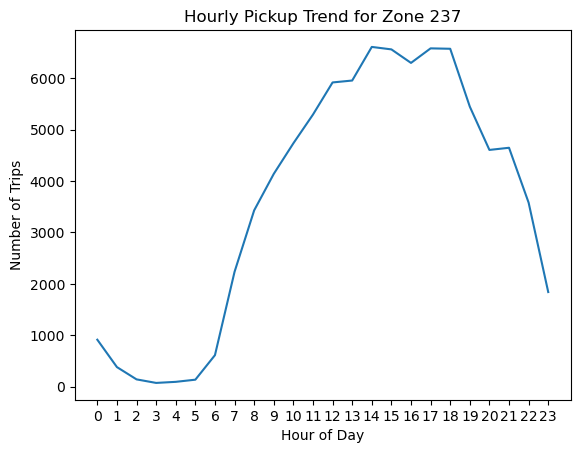

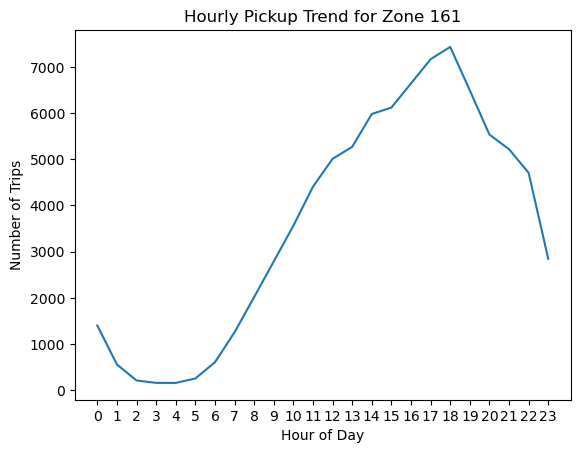

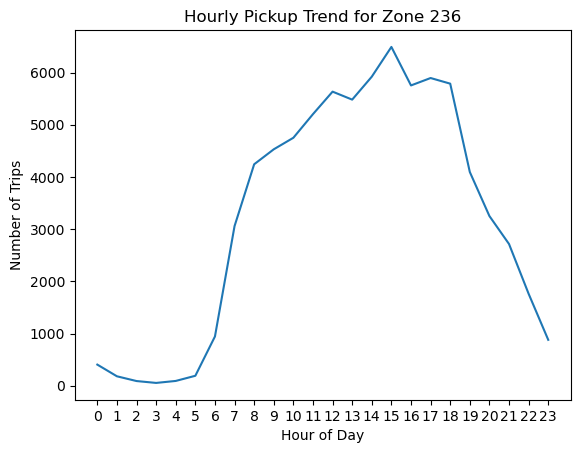

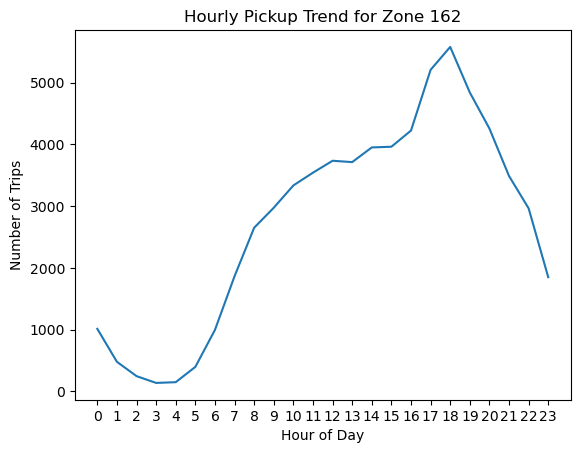

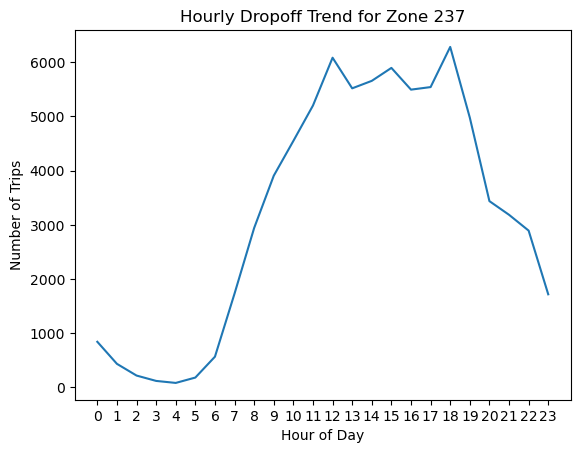

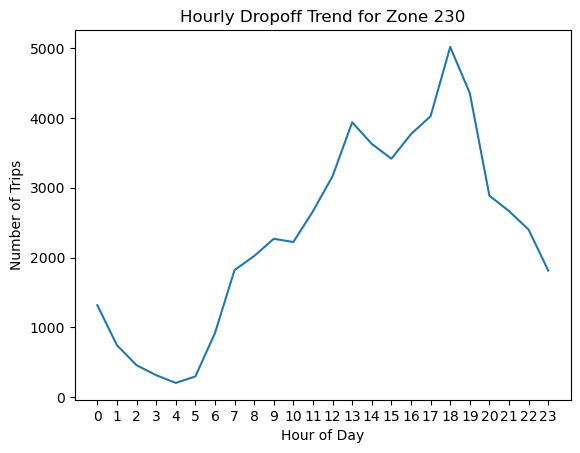

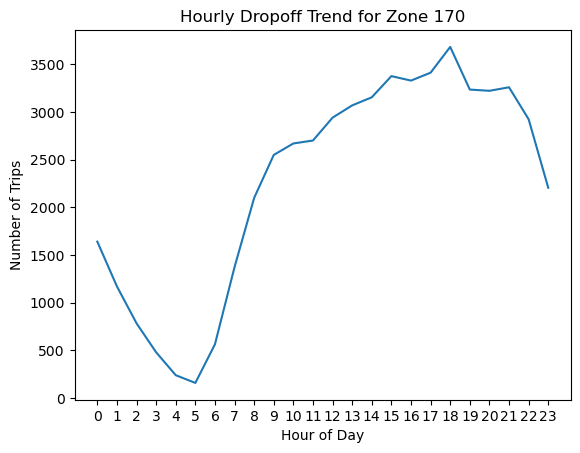

In [266]:
# Find top 10 pickup and dropoff zones
# Grouping by pickup zone and hour, then calculate average hourly pickups
hourly_pickups = new_df.groupby(['PULocationID', new_df['tpep_pickup_datetime'].dt.hour])['VendorID'].count().groupby(level=0).mean().sort_values(ascending=False)

# Grouping by dropoff zone and hour, then calculate average hourly dropoffs
hourly_dropoffs = new_df.groupby(['DOLocationID', new_df['tpep_dropoff_datetime'].dt.hour])['VendorID'].count().groupby(level=0).mean().sort_values(ascending=False)

# Getting top 10 pickup and dropoff zones
top_10_pickup_zones = hourly_pickups.head(10)
top_10_dropoff_zones = hourly_dropoffs.head(10)

print("Top 10 Pickup Zones:")
print(top_10_pickup_zones)
print("\nTop 10 Dropoff Zones:")
print(top_10_dropoff_zones)

def plot_hourly_trend(df, location_id, location_type='pickup'):
    if location_type == 'pickup':
        hourly_data = df[df['PULocationID'] == location_id].groupby(df['tpep_pickup_datetime'].dt.hour)['VendorID'].count()
    else:
        hourly_data = df[df['DOLocationID'] == location_id].groupby(df['tpep_dropoff_datetime'].dt.hour)['VendorID'].count()
    
    plt.plot(hourly_data.index, hourly_data.values)
    plt.title(f"Hourly {location_type.capitalize()} Trend for Zone {location_id}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of Trips")
    plt.xticks(range(0, 24))
    plt.show()

# Plot trends for top 5 pickup and dropoff zones
for zone in top_10_pickup_zones.head().index:
    plot_hourly_trend(new_df, zone, 'pickup')

for zone in top_10_dropoff_zones.head().index:
    plot_hourly_trend(new_df, zone, 'dropoff')


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [268]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Calculating pickup and dropoff counts for each zone
pickup_counts = new_df.groupby('PULocationID')['VendorID'].count()
dropoff_counts = new_df.groupby('DOLocationID')['VendorID'].count()

# Calculating pickup/dropoff ratio
ratio = pickup_counts / dropoff_counts

# Sorting ratios and get top 10 highest and lowest
top_10 = ratio.nlargest(10)
bottom_10 = ratio.nsmallest(10)

print("Top 10 highest pickup/dropoff ratios:")
print(top_10)

print("\nBottom 10 lowest pickup/dropoff ratios:")
print(bottom_10)


Top 10 highest pickup/dropoff ratios:
70     8.310379
132    4.601338
138    2.880340
186    1.581525
43     1.374709
114    1.374700
249    1.326441
162    1.255995
161    1.199226
100    1.191142
Name: VendorID, dtype: float64

Bottom 10 lowest pickup/dropoff ratios:
27     0.025641
221    0.029412
1      0.036669
257    0.038411
109    0.043478
115    0.043478
198    0.052685
112    0.056812
252    0.059155
37     0.059669
Name: VendorID, dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [270]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filtering for night hours (11 PM to 5 AM)
night_df = new_df[(new_df['tpep_pickup_datetime'].dt.hour >= 23) | (new_df['tpep_pickup_datetime'].dt.hour < 5)]

# Top 10 pickup zones during night hours
night_pickups = night_df.groupby('PULocationID')['VendorID'].count().sort_values(ascending=False).head(10)

# Top 10 dropoff zones during night hours
night_dropoffs = night_df.groupby('DOLocationID')['VendorID'].count().sort_values(ascending=False).head(10)

print("Top 10 pickup zones during night hours:")
print(night_pickups)

print("\nTop 10 dropoff zones during night hours:")
print(night_dropoffs)

Top 10 pickup zones during night hours:
PULocationID
79     15308
132    13296
249    12335
48      9778
148     9521
114     8701
230     7758
186     6216
164     5947
138     5919
Name: VendorID, dtype: int64

Top 10 dropoff zones during night hours:
DOLocationID
79     8227
48     6631
170    6071
107    5619
68     5540
141    5113
249    4891
263    4871
148    4315
230    4288
Name: VendorID, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [275]:
# Filter for night hours (11 PM to 5 AM)

# Defining night hours (11 PM to 5 AM)
new_df['is_night'] = ((new_df['tpep_pickup_datetime'].dt.hour >= 23) | (new_df['tpep_pickup_datetime'].dt.hour < 5))

# Calculating total revenue for night and day
night_revenue = new_df[new_df['is_night']]['total_amount'].sum()
day_revenue = new_df[new_df['is_night']]['total_amount'].sum()

# Calculating total revenue
total_revenue = night_revenue + day_revenue

# Calculating revenue shares
night_share = night_revenue / total_revenue * 100
day_share = day_revenue / total_revenue * 100

print(f"Night revenue share: {night_share:.2f}%")
print(f"Day revenue share: {day_share:.2f}%")

Night revenue share: 50.00%
Day revenue share: 50.00%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

   passenger_count  fare_per_mile_per_passenger
0              0.0                          NaN
1              1.0                     0.253610
2              2.0                     0.098141
3              3.0                     0.086697
4              4.0                     0.097048
5              5.0                     0.095814
6              6.0                     0.028167


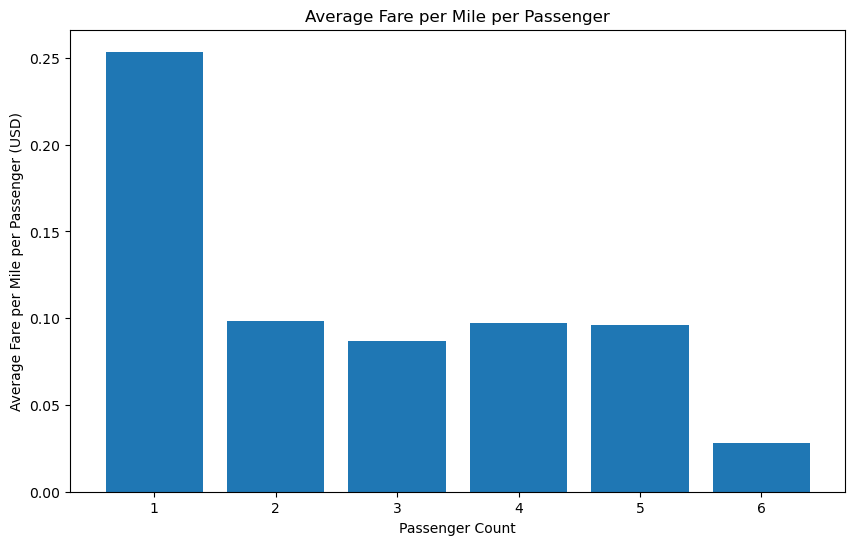

In [287]:
# Analyse the fare per mile per passenger for different passenger counts
# Calculating fare per mile
new_df['fare_per_mile'] = new_df['fare_amount'] / new_df['trip_distance']

# Calculating fare per mile per passenger
new_df['fare_per_mile_per_passenger'] = new_df['fare_per_mile'] / new_df['passenger_count']

# Group by passenger count and calculate average fare per mile per passenger
avg_fare_per_passenger = new_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

print(avg_fare_per_passenger)
plt.figure(figsize=(10, 6))
plt.bar(avg_fare_per_passenger['passenger_count'], avg_fare_per_passenger['fare_per_mile_per_passenger'])
plt.title('Average Fare per Mile per Passenger')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger (USD)')
plt.show()



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

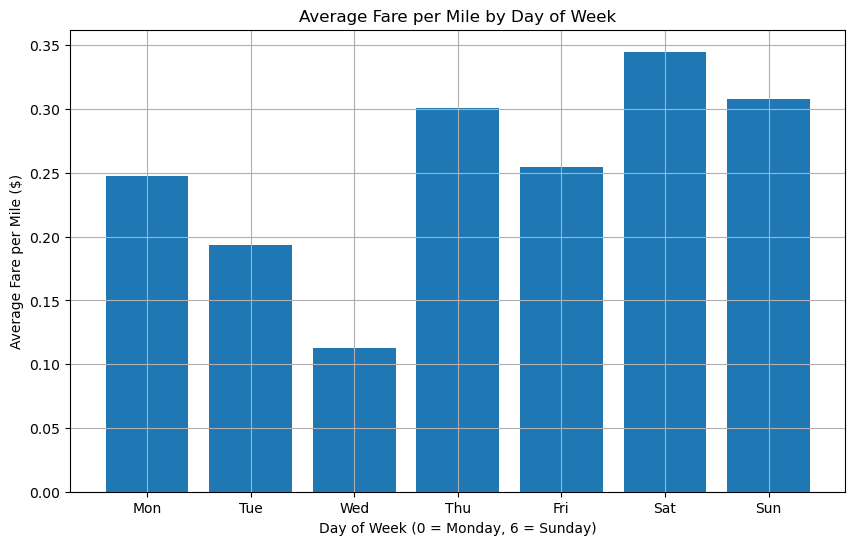

In [290]:
# Compare the average fare per mile for different days and for different times of the day

# Extracting hour and day of week
new_df['hour'] = new_df['tpep_pickup_datetime'].dt.hour
new_df['day_of_week'] = new_df['tpep_pickup_datetime'].dt.dayofweek

# Calculating fare per mile
new_df['fare_per_mile'] = new_df['fare_amount'] / new_df['trip_distance']

# Grouping by hour and calculate average fare per mile
hourly_fare = new_df.groupby('hour')['fare_per_mile'].mean().reset_index()

# Grouping by day of week and calculate average fare per mile
daily_fare = new_df.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# hourly fare per mile
plt.figure(figsize=(12, 6))
plt.plot(hourly_fare['hour'], hourly_fare['fare_per_mile'])
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# daily fare per mile
plt.figure(figsize=(10, 6))
plt.bar(daily_fare['day_of_week'], daily_fare['fare_per_mile'])
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [293]:
# Compare fare per mile for different vendors

# Calculate fare per mile
new_df['fare_per_mile'] = new_df['fare_amount'] / new_df['trip_distance']

# Group by vendor and hour, then calculate average fare per mile
vendor_hourly_fare = new_df.groupby(['VendorID', new_df['tpep_pickup_datetime'].dt.hour])['fare_per_mile'].mean().reset_index()

# Pivot the data for easier plotting
vendor_hourly_fare_pivot = vendor_hourly_fare.pivot(index='tpep_pickup_datetime', columns='VendorID', values='fare_per_mile')

# Plot the results
plt.figure(figsize=(12, 6))
vendor_hourly_fare_pivot.plot(marker='o')
plt.title('Average Fare per Mile by Vendor and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile ($)')
plt.legend(title='Vendor ID')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


/var/folders/zx/ddt9vhvn24zcwr94ds7ytwm80000gp/T/ipykernel_59540/2346168098.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_analysis = new_df.groupby(['VendorID', 'distance_tier']).apply(lambda x: x['fare_amount'].sum() / x['trip_distance'].sum()).reset_index(name='avg_fare_per_mile')


VendorID              1         2
distance_tier                    
0-2 miles      0.291828  0.297528
2-5 miles      0.244314  0.251606
5+ miles       0.094490  0.096343


/var/folders/zx/ddt9vhvn24zcwr94ds7ytwm80000gp/T/ipykernel_59540/2346168098.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fare_analysis = new_df.groupby(['VendorID', 'distance_tier']).apply(lambda x: x['fare_amount'].sum() / x['trip_distance'].sum()).reset_index(name='avg_fare_per_mile')


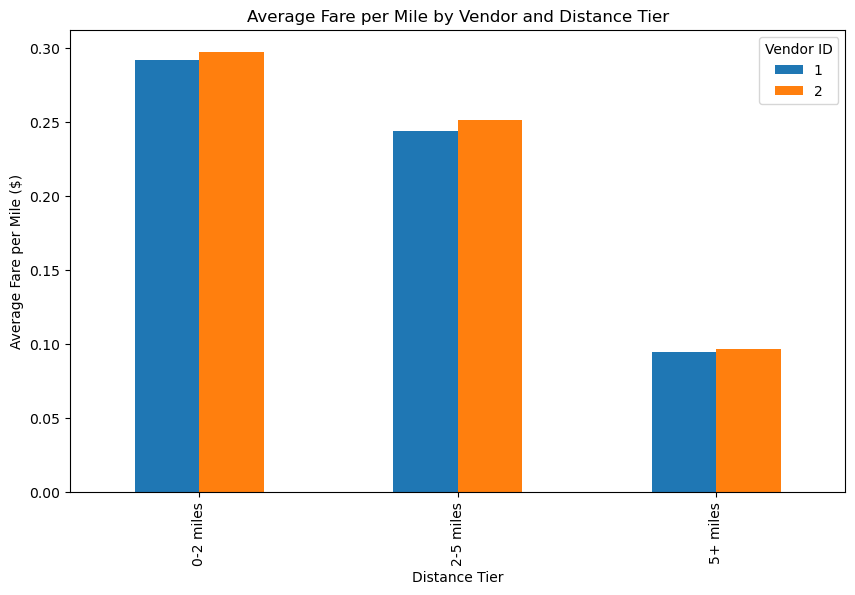

In [297]:
# Defining distance tiers

# Define distance tiers
new_df['distance_tier'] = pd.cut(new_df['trip_distance'], 
                             bins=[0, 2, 5, float('inf')], 
                             labels=['0-2 miles', '2-5 miles', '5+ miles'])

# Calculate average fare per mile for each vendor and distance tier
fare_analysis = new_df.groupby(['VendorID', 'distance_tier']).apply(lambda x: x['fare_amount'].sum() / x['trip_distance'].sum()).reset_index(name='avg_fare_per_mile')

# Pivot the results for easier comparison
fare_comparison = fare_analysis.pivot(index='distance_tier', columns='VendorID', values='avg_fare_per_mile')

print(fare_comparison)

# Visualize the results
fare_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile ($)')
plt.legend(title='Vendor ID')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

/var/folders/zx/ddt9vhvn24zcwr94ds7ytwm80000gp/T/ipykernel_59540/420420712.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_distance = new_df.groupby('distance_category')['tip_percentage'].mean()


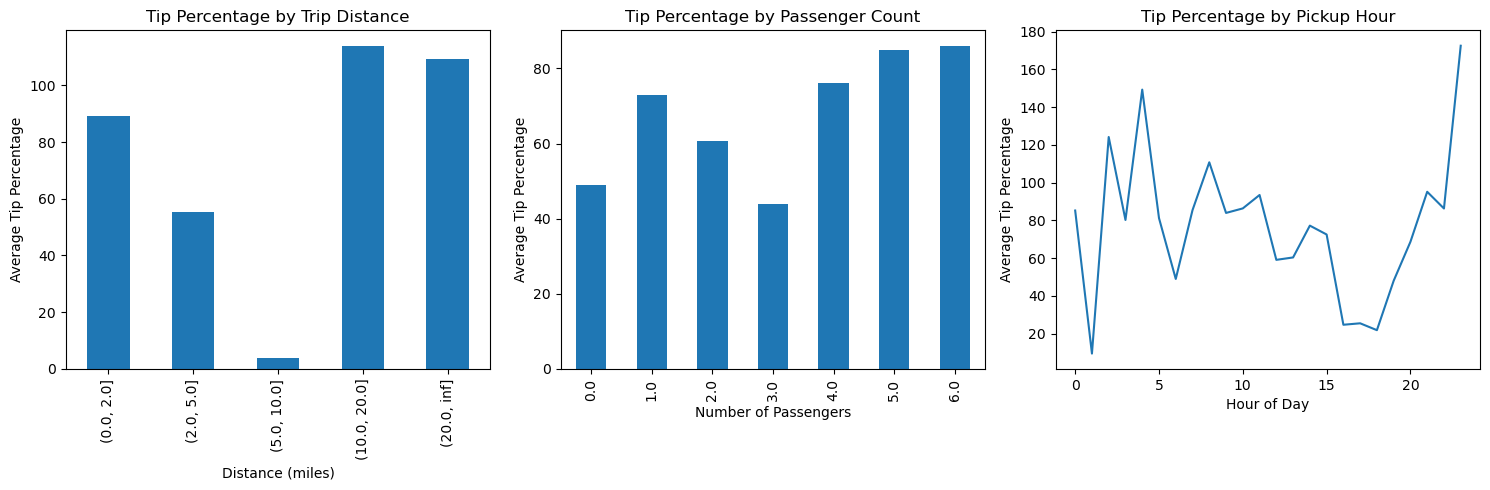

In [304]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage
new_df['tip_percentage'] = new_df['tip_amount'] / new_df['total_amount'] * 100

# Analyze tip percentage by trip distance
distance_bins = [0, 2, 5, 10, 20, np.inf]
new_df['distance_category'] = pd.cut(new_df['trip_distance'], bins=distance_bins)
tip_by_distance = new_df.groupby('distance_category')['tip_percentage'].mean()

# Analyze tip percentage by passenger count
tip_by_passengers = new_df.groupby('passenger_count')['tip_percentage'].mean()

# Analyze tip percentage by time of pickup
new_df['pickup_hour'] = new_df['tpep_pickup_datetime'].dt.hour
tip_by_hour = new_df.groupby('pickup_hour')['tip_percentage'].mean()

# Visualize results
plt.figure(figsize=(15, 5))

plt.subplot(131)
tip_by_distance.plot(kind='bar')
plt.title('Tip Percentage by Trip Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Average Tip Percentage')

plt.subplot(132)
tip_by_passengers.plot(kind='bar')
plt.title('Tip Percentage by Passenger Count')
plt.xlabel('Number of Passengers')
plt.ylabel('Average Tip Percentage')

plt.subplot(133)
tip_by_hour.plot(kind='line')
plt.title('Tip Percentage by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip Percentage')

plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [302]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Calculate tip percentage
new_df['tip_percentage'] = new_df['tip_amount'] / new_df['total_amount'] * 100

# Define low and high tip groups
low_tip = new_df[new_df['tip_percentage'] < 10]
high_tip = new_df[new_df['tip_percentage'] > 25]

# Compare various aspects
aspects = ['trip_distance', 'fare_amount', 'passenger_count', 'trip_duration']

for aspect in aspects:
    print(f"\nComparing {aspect}:")
    print(f"Low tip average: {low_tip[aspect].mean():.2f}")
    print(f"High tip average: {high_tip[aspect].mean():.2f}")

# Compare time of day
low_tip_hour = low_tip['tpep_pickup_datetime'].dt.hour.mean()
high_tip_hour = high_tip['tpep_pickup_datetime'].dt.hour.mean()
print(f"\nAverage pickup hour:")
print(f"Low tip: {low_tip_hour:.2f}")
print(f"High tip: {high_tip_hour:.2f}")

# Compare payment types
print("\nPayment type distribution:")
print("Low tip:")
print(low_tip['payment_type'].value_counts(normalize=True))
print("\nHigh tip:")
print(high_tip['payment_type'].value_counts(normalize=True))


Comparing trip_distance:
Low tip average: 0.03
High tip average: -0.01

Comparing fare_amount:
Low tip average: 0.19
High tip average: -0.04

Comparing passenger_count:
Low tip average: 1.37
High tip average: 1.37

Comparing trip_duration:
Low tip average: 0.30
High tip average: 0.29

Average pickup hour:
Low tip: 14.34
High tip: 14.28

Payment type distribution:
Low tip:
payment_type
1    0.820798
2    0.167625
4    0.007122
3    0.004455
Name: proportion, dtype: float64

High tip:
payment_type
1    0.808194
2    0.178838
4    0.007763
3    0.005205
Name: proportion, dtype: float64


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

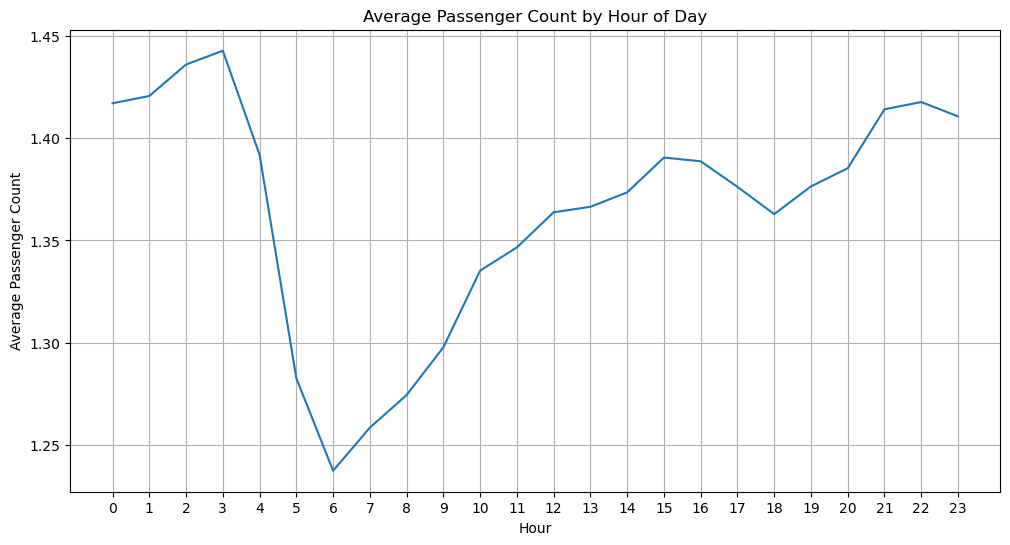

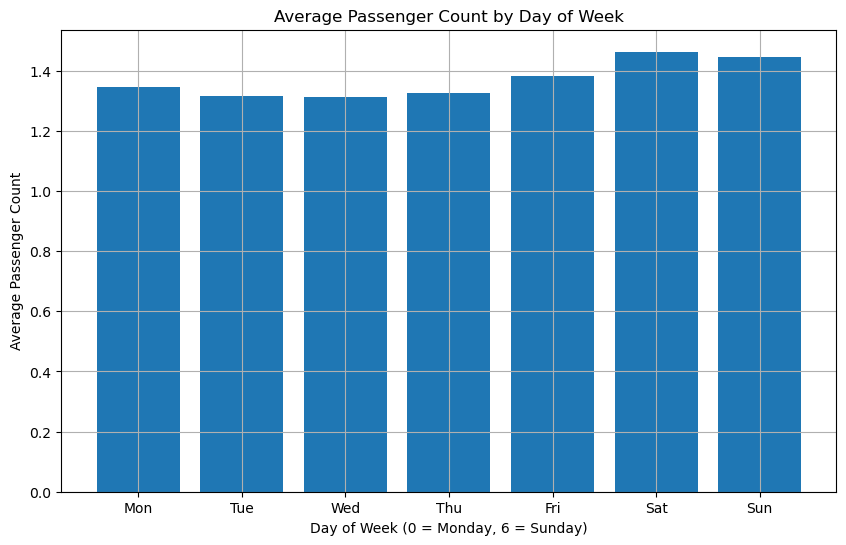

In [309]:
# See how passenger count varies across hours and days

# Extract hour and day of week from pickup datetime
new_df['hour'] = new_df['tpep_pickup_datetime'].dt.hour
new_df['day_of_week'] = new_df['tpep_pickup_datetime'].dt.dayofweek

# Calculate average passenger count by hour and day of week
hourly_passengers = new_df.groupby('hour')['passenger_count'].mean()
daily_passengers = new_df.groupby('day_of_week')['passenger_count'].mean()

# Visualize hourly passenger count
plt.figure(figsize=(12, 6))
plt.plot(hourly_passengers.index, hourly_passengers.values)
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Visualize daily passenger count
plt.figure(figsize=(10, 6))
plt.bar(daily_passengers.index, daily_passengers.values)
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Passenger Count')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [311]:
# How does passenger count vary across zones

# Calculate average passenger count per zone
zone_passenger_counts = new_df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge with zone information
zone_passenger_counts = zone_passenger_counts.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID')

# Sort zones by average passenger count
zone_passenger_counts = zone_passenger_counts.sort_values('passenger_count', ascending=False)

# Visualize top 10 zones by average passenger count
plt.figure(figsize=(12, 6))
sns.barplot(x='zone', y='passenger_count', data=zone_passenger_counts.head(10))
plt.title('Top 10 Zones by Average Passenger Count')
plt.xlabel('Zone')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Zones with highest average passenger counts:")
print(zone_passenger_counts[['zone', 'passenger_count']].head(10))

print("\nZones with lowest average passenger counts:")
print(zone_passenger_counts[['zone', 'passenger_count']].tail(10))

Zones with highest average passenger counts:
                        zone  passenger_count
5    Arrochar/Fort Wadsworth         1.875000
196        Rossville/Woodrow         1.800000
187                 Red Hook         1.783920
11              Battery Park         1.725944
56              Country Club         1.666667
170      Ocean Parkway South         1.666667
64        DUMBO/Vinegar Hill         1.576017
186          Randalls Island         1.539683
252       World Trade Center         1.532312
43                 Chinatown         1.522285

Zones with lowest average passenger counts:
                                  zone  passenger_count
103                        Great Kills         1.000000
98                           Glen Oaks         1.000000
213                          Stapleton         1.000000
94           Forest Park/Highland Park         1.000000
4                        Arden Heights         1.000000
82   Eltingville/Annadale/Prince's Bay         1.000000
29          

<Figure size 1200x800 with 0 Axes>

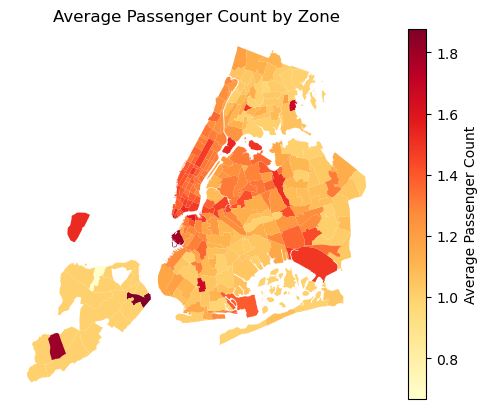

In [343]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Calculate average passenger count per zone
avg_passengers = new_df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge average passenger count with zones GeoDataFrame
zones_with_trips = zones.merge(avg_passengers, left_on='LocationID', right_on='PULocationID', how='left')

# Rename the new column for clarity
zones_with_trips = zones_with_trips.rename(columns={'passenger_count': 'avg_passenger_count'})

# Visualize the average passenger count per zone
plt.figure(figsize=(12, 8))
zones_with_trips.plot(column='avg_passenger_count', cmap='YlOrRd', legend=True, 
                      legend_kwds={'label': 'Average Passenger Count'})
plt.title('Average Passenger Count by Zone')
plt.axis('off')
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [338]:
# How often is each surcharge applied?


surcharge_frequency['extra'] = (new_df['extra'] > 0).mean() * 100
print("Frequency of surcharges being applied (%):")
print(f"{surcharge}: {freq:.2f}%")

# Filter trips with surcharges applied
new_df['has_surcharge'] = (new_df[surcharge_columns].sum(axis=1) > 0)

# Group by pickup zones and calculate the percentage of trips with surcharges
pickup_surcharge_zones = new_df.groupby('PULocationID')['has_surcharge'].mean().reset_index(name='surcharge_percentage')
pickup_surcharge_zones = pickup_surcharge_zones.sort_values('surcharge_percentage', ascending=False)

# Group by dropoff zones and calculate the percentage of trips with surcharges
dropoff_surcharge_zones = new_df.groupby('DOLocationID')['has_surcharge'].mean().reset_index(name='surcharge_percentage')
dropoff_surcharge_zones = dropoff_surcharge_zones.sort_values('surcharge_percentage', ascending=False)

# Group by hour to analyze times with high surcharges
new_df['hour'] = new_df['tpep_pickup_datetime'].dt.hour
hourly_surcharges = new_df.groupby('hour')['has_surcharge'].mean().reset_index(name='surcharge_percentage')

# Display top 10 zones and hourly trends
print("Top 10 Pickup Zones with High Surcharges:")
print(pickup_surcharge_zones.head(10))

print("\nTop 10 Dropoff Zones with High Surcharges:")
print(dropoff_surcharge_zones.head(10))

print("\nHourly Trends in Surcharges:")
print(hourly_surcharges)

plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='surcharge_percentage', data=hourly_surcharges)
plt.title('Percentage of Trips with Surcharges by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Trips with Surcharges')
plt.show()

Frequency of surcharges being applied (%):
extra: 41.05%
Top 10 Pickup Zones with High Surcharges:
     PULocationID  surcharge_percentage
26             27              1.000000
213           221              1.000000
104           111              1.000000
191           199              1.000000
198           206              0.750000
242           251              0.666667
56             58              0.666667
179           187              0.666667
42             44              0.625000
196           204              0.600000

Top 10 Dropoff Zones with High Surcharges:
     DOLocationID  surcharge_percentage
1               2              0.750000
105           109              0.652174
133           138              0.569621
43             44              0.565217
57             58              0.545455
110           115              0.521739
29             30              0.500000
7               8              0.500000
247           253              0.500000
52             53

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# Key Findings:
# Demand Patterns:

Peak Hours: Morning (8-9 AM) and evening (5-7 PM) rush hours show the highest demand.

Peak Days: Weekdays, especially Fridays, have higher demand than weekends.

Peak Months: Fall and spring months exhibit higher demand due to favourable weather and tourist seasons.

# Zone Analysis:

High-Demand Zones: Manhattan areas like Midtown and Upper East Side, along with JFK and LaGuardia airports.

Low-Demand Zones: Residential areas in outer boroughs.

# Pricing and Revenue:

Average Fare per Mile: Varies by time of day and passenger count.

Higher Fares: During peak hours and for longer trips.

Tip Percentages: Generally higher for longer trips and during evening hours.

# Operational Inefficiencies:

Slow Routes: Identified during peak hours, suggesting potential traffic bottlenecks.

Variability in Passenger Counts: Across zones, indicating opportunities for targeted fleet allocation.
                                                                       
1) Real-time Traffic Updates: Integrate real-time traffic data to optimize routes and reduce travel times.

2) Dynamic Dispatching: Use predictive analytics to dispatch cabs to high-demand areas before peak hours.

3) Route Optimization Algorithms: Implement algorithms that minimize travel time and reduce fuel consumption.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
1) Zone-Based Allocation: Position more cabs in high-demand zones during peak hours.

2) Dynamic Relocation: Periodically relocate cabs from low-demand to high-demand areas based on real-time demand forecasts.

3) Airport and Event Strategies: Increase cab availability near airports and event venues during peak travel times.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
1) Dynamic Pricing: Implement surge pricing during peak hours and in high-demand zones to maximize revenue.

2) Tiered Pricing: Offer discounts for longer trips or off-peak hours to maintain competitiveness.

3) Zone-Specific Pricing: Adjust base fares based on zone characteristics (e.g., higher base fares in Manhattan).

# Conclusion:
By leveraging these insights, taxi operators can optimize their services to meet customer demand more effectively, reduce operational inefficiencies, and maximize revenue. Strategic positioning of cabs, dynamic pricing strategies, and optimized routing will enhance customer satisfaction while maintaining competitive pricing in the market.

Suitable Parameters for Strategy Development:
Location: Focus on high-demand zones and airports.

Time of Day: Peak hours are morning and evening rush hours.

Day of the Week: Weekdays, especially Fridays, have higher demand.

Month: Fall and spring months are peak seasons.

By considering these parameters, taxi operators can develop targeted strategies to improve service efficiency and customer satisfaction.
